In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable 
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from torchvision import datasets, transforms
# from PIL import Image

In [2]:
BATCH_SIZE=32 #大概需要2G的显存
EPOCHS=5
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
nrow = 28
ncol = 28
mnist_train = pd.read_csv('fashion-mnist_train.csv')

In [3]:
def left_top(x):
    nsam = x.shape[0]
    nrow = x.shape[1]
    ncol = x.shape[2]
    z = np.zeros((nsam, nrow, ncol), dtype=np.double)
    data1 = np.concatenate((x, z), axis=1)
    data2 = np.concatenate((z, z), axis=1)
    data3 = np.concatenate((data1, data2), 2)
    return data3
def right_bottom(x):
    nsam = x.shape[0]
    nrow = x.shape[1]
    ncol = x.shape[2]
    z = np.zeros((nsam, nrow, ncol), dtype=np.double)
    data1 = np.concatenate((z, z), axis=1)
    data2 = np.concatenate((z, x), axis=1)
    data3 = np.concatenate((data1, data2), 2)
    return data3

In [4]:
def getType(dataset,x):
    index = np.where(dataset[:, 0] == x)
    for i in index:
        Type = dataset[i]
    return Type

In [5]:
def getPixel(x):
    pixel = x[:, 1:]
    return pixel
def getLabel(x):
    label = x[:, 0]
    return label

In [6]:
train = mnist_train.values

mnist_train_0=getType(train,0)
mnist_train_1=getType(train,1)   
mnist_train_2=getType(train,2)
mnist_train_3=getType(train,3)  

# X and label
x1 = getPixel(mnist_train_1)
x0 =getPixel(mnist_train_0)
y1 = getLabel(mnist_train_1)
y0 = getLabel(mnist_train_0)
x2 = getPixel(mnist_train_2)
x3 =getPixel(mnist_train_3)
y2= getLabel(mnist_train_2)
y3 = getLabel(mnist_train_3)

# X reshape to 28 28

nx1 = x1.shape[0]
nx0 = x0.shape[0]
nx2 = x2.shape[0]
nx3 = x3.shape[0]

x0_reshape = x0.reshape((nx0, nrow, ncol))
x1_reshape = x1.reshape((nx1, nrow, ncol))
x2_reshape = x2.reshape((nx2, nrow, ncol))
x3_reshape = x3.reshape((nx3, nrow, ncol))
#------------------------------------------
left0 = left_top(x0_reshape)
right1 = right_bottom(x1_reshape) 
left2=left_top(x2_reshape)
right3=right_bottom(x3_reshape)
#------------------------------------------

train_data1 = np.concatenate((left0, right1), axis=0)
train_data2 = np.concatenate((left2, right3), axis=0)
train_data= np.concatenate((train_data1, train_data2), axis=0)


# reshape to 3136 which is 56*56
train_data_reshape = train_data
train_data_reshape = torch.from_numpy(train_data_reshape)
xtr = torch.unsqueeze(train_data_reshape, 1)

yy1 = np.concatenate((y0, y1), axis=0)
yy2=np.concatenate((y2, y3), axis=0)
yy=np.concatenate((yy1, yy2), axis=0)

ytr=torch.from_numpy(yy)

In [7]:
import matplotlib
import matplotlib.pyplot as plt
def plt_digit(x):
    nrow = 56
    ncol = 56
    xsq = x.reshape((nrow,ncol))
    plt.imshow(xsq,  cmap='Greys_r')
    plt.xticks([])
    plt.yticks([])

plt.subplot(1,4,1)
plt_digit(xtr[1,:])
plt.subplot(1,4,2)
plt_digit(xtr[10000,:])
plt.subplot(1,4,3)
plt_digit(xtr[15000,:])
plt.subplot(1,4,4)
plt_digit(xtr[20000,:])



In [8]:
class train(Dataset):
    def __init__(self):
        
        
      
        self.len = ytr.shape[0]
        self.x_data = xtr
        self.y_data = ytr


    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]
      

    def __len__(self):
        return self.len
dataset1= train()
train_loader = DataLoader(dataset=dataset1,
                          batch_size=32,
                          shuffle=True,
                          num_workers=2)

In [9]:
mnist_test = pd.read_csv('fashion-mnist_test.csv')
testtest= mnist_test.values


test0=getType(testtest,0)
test1=getType(testtest,1)
test2=getType(testtest,2)
test3=getType(testtest,3)
nrow = 28
ncol = 28

# X and label
x1 = getPixel(test1)
x0 =getPixel(test0)
y1 = getLabel(test1)
y0 = getLabel(test0)
x2 = getPixel(test2)
x3 =getPixel(test3)
y2 = getLabel(test2)
y3 = getLabel(test3)



# X reshape to 28 28
nx1 = x1.shape[0]
nx0 = x0.shape[0]
nx2 = x2.shape[0]
nx3 = x3.shape[0]

x0_reshape = x0.reshape((nx0, nrow, ncol))
x1_reshape = x1.reshape((nx1, nrow, ncol))
x2_reshape = x2.reshape((nx2, nrow, ncol))
x3_reshape = x3.reshape((nx3, nrow, ncol))

#------------------------------------------
right0 = right_bottom(x0_reshape)
left1 = left_top(x1_reshape)
left2=left_top(x2_reshape)
right3=right_bottom(x3_reshape)
#------------------------------------------        


train_data1 = np.concatenate((right0, left1), axis=0)
train_data2 = np.concatenate((left2, right3), axis=0)
xts= np.concatenate((train_data1, train_data2), axis=0)

#------------------------------------------


xts = torch.from_numpy(xts)
xts = torch.unsqueeze(xts, 1)

yy1 = np.concatenate((y0, y1), axis=0)
yy2=np.concatenate((y2, y3), axis=0)
yts=np.concatenate((yy1, yy2), axis=0)


yts=torch.from_numpy(yts)

IndexError: index 4000 is out of bounds for dimension 0 with size 4000

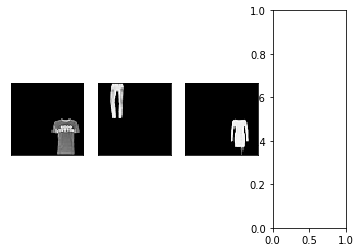

In [10]:
import matplotlib
import matplotlib.pyplot as plt
def plt_digit(x):
    nrow = 56
    ncol = 56
    xsq = x.reshape((nrow,ncol))
    plt.imshow(xsq,  cmap='Greys_r')
    plt.xticks([])
    plt.yticks([])

plt.subplot(1,4,1)
plt_digit(xts[1,:])
plt.subplot(1,4,2)
plt_digit(xts[1000,:])
plt.subplot(1,4,3)
plt_digit(xts[3000,:])
plt.subplot(1,4,4)
plt_digit(xts[4000,:])




In [ ]:
class test(Dataset):
    def __init__(self):

        
        
      
        self.len = yts.shape[0]

        self.x_data = xts

        self.y_data = yts


    def __getitem__(self, index):
        # img = Image.fromarray(self.x_data[index])
        return self.x_data[index], self.y_data[index]

    def __len__(self):
        return self.len
dataset2 = test()
test_loader = DataLoader(dataset=dataset2,
                          batch_size=32,
                          shuffle=True,
                          num_workers=2)

In [ ]:
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        # 1,28x28
        self.conv1=nn.Conv2d(1,10,5) # 10, 24x24
        self.conv2=nn.Conv2d(10,20,3) # 128, 10x10
        self.fc1 = nn.Linear(2880,300)
        self.fc2 = nn.Linear(300,4)
    def forward(self,x):
        in_size = x.size(0)
        out = self.conv1(x) #24
        out = F.relu(out)
        out = F.max_pool2d(out, 2, 2)  #12
        out = self.conv2(out) #10
        out = F.relu(out)
        out = F.max_pool2d(out, 2, 2)  #12
        out = F.relu(out)   
        out = out.view(in_size,-1)
        out = self.fc1(out)
        out = F.relu(out)
        out = self.fc2(out)
        # out = F.log_softmax(out,dim=1)
        # out = F.softmax(out,dim=1)
        return out

In [ ]:
model = ConvNet()
model = model.to(DEVICE)
model= model.double()
optimizer = optim.Adam(model.parameters())
# criterion = nn.CrossEntropyLoss()

In [ ]:
def train(model, device, train_loader, optimizer, epoch):
    model.train()

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        # print(data.size(), target.size())
        optimizer.zero_grad()
        output=model(data)
        # print(output)
        #print(target)
        # loss = F.nll_loss(output, target)
        # print(loss)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if(batch_idx+1)%100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data.double())
#             print(target)
#             print(output)
            test_loss += F.cross_entropy(output, target, reduction='sum').item() # 将一批的损失相加
            pred = output.max(1, keepdim=True)[1] # 找到概率最大的下标
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.4f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))





In [ ]:
for epoch in range(1, EPOCHS + 1):
    train(model, DEVICE, train_loader, optimizer, epoch)
    test(model, DEVICE, test_loader)